# Text mining LOTR

In [1]:
from textblob import TextBlob 
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import matplotlib
import nltk
import re
nltk.download('stopwords')
nltk.download('punkt')
nltk.download('averaged_perceptron_tagger')
from collections import Counter
sns.set()

[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\Owner\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package punkt to
[nltk_data]     C:\Users\Owner\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package averaged_perceptron_tagger to
[nltk_data]     C:\Users\Owner\AppData\Roaming\nltk_data...
[nltk_data]   Package averaged_perceptron_tagger is already up-to-
[nltk_data]       date!


## Tokenization

In [2]:
with open('The Lord of the Rings.txt', 'r', errors='ignore') as file:
    data = file.read().replace('\n', '')

In [3]:
text_lotr = data[10000:400000]

In [4]:
len(text_lotr)

390000

In [5]:
# Sentence tokenization for sample

from nltk.tokenize import sent_tokenize
tokenized_sent = sent_tokenize(text_lotr)
print(tokenized_sent)

['s own with which to challenge the self-styled Ruler of Middle-earth.', 'In that conflict both sides would have held hobbits in hatred and contempt: they would not long have survived even as slaves.', 'Other arrangements could be devised according to the tastes or views of those who like allegory or topical reference.', 'But I cordially dislike allegory in all its manifestations, and always have done so since I grew old and wary enough to detect its presence.', 'I much prefer history, true or feigned, with its varied applicability to the thought and experience of readers.', "I think that many confuse 'applicability' with 'allegory'; but the one resides in the freedom of the reader, and the other in the purposed domination of the author.", 'An author cannot of course remain wholly unaffected by his experience, but the ways in which a story-germ uses the soil of experience are extremely complex, and attempts to define the process are at best guesses from evidence that is inadequate and 

In [6]:
# Sentence tokenization for entire text

from nltk.tokenize import sent_tokenize
tokenized_sent_full = sent_tokenize(data)

In [7]:
# Word tokenization

from nltk.tokenize import word_tokenize
tokenized_word = word_tokenize(text_lotr)
print(tokenized_word)

['s', 'own', 'with', 'which', 'to', 'challenge', 'the', 'self-styled', 'Ruler', 'of', 'Middle-earth', '.', 'In', 'that', 'conflict', 'both', 'sides', 'would', 'have', 'held', 'hobbits', 'in', 'hatred', 'and', 'contempt', ':', 'they', 'would', 'not', 'long', 'have', 'survived', 'even', 'as', 'slaves', '.', 'Other', 'arrangements', 'could', 'be', 'devised', 'according', 'to', 'the', 'tastes', 'or', 'views', 'of', 'those', 'who', 'like', 'allegory', 'or', 'topical', 'reference', '.', 'But', 'I', 'cordially', 'dislike', 'allegory', 'in', 'all', 'its', 'manifestations', ',', 'and', 'always', 'have', 'done', 'so', 'since', 'I', 'grew', 'old', 'and', 'wary', 'enough', 'to', 'detect', 'its', 'presence', '.', 'I', 'much', 'prefer', 'history', ',', 'true', 'or', 'feigned', ',', 'with', 'its', 'varied', 'applicability', 'to', 'the', 'thought', 'and', 'experience', 'of', 'readers', '.', 'I', 'think', 'that', 'many', 'confuse', "'applicability", "'", 'with', "'allegory", "'", ';', 'but', 'the', 'on

In [8]:
from nltk.probability import FreqDist
dist_words = FreqDist(tokenized_word)
print(dist_words)

<FreqDist with 6921 samples and 84224 outcomes>


In [9]:
dist_words.most_common(10)

[(',', 4627),
 ('.', 4122),
 ('the', 3939),
 ('and', 2871),
 ('of', 1816),
 ('to', 1527),
 ('a', 1411),
 ("'", 1336),
 ('in', 1060),
 ('was', 1029)]

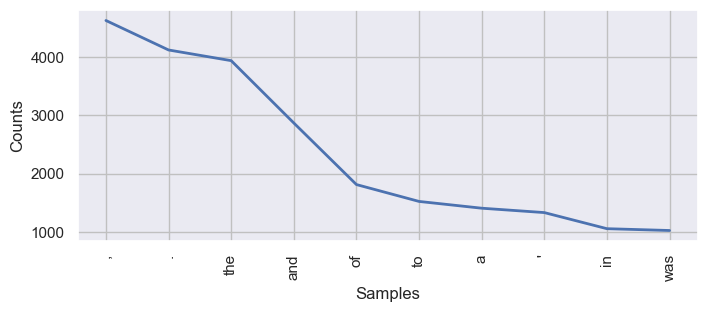

In [10]:
# Frequency Distribution Plot

plt.figure(figsize=(8, 3))
dist_words.plot(10,cumulative = False)
plt.show()

## Stopwords

In [11]:
# Defining stopwords

from nltk.corpus import stopwords
stop_words = set(stopwords.words("english"))
print(stop_words)

{'as', 'been', "you're", 'their', 'can', 'himself', 'themselves', 'few', 'over', 'ma', 'being', 's', 'won', 'yours', 'my', 'you', 'yourselves', 'are', 'while', 'an', 'does', 'what', 'against', 'so', "needn't", 'which', 'ain', 'up', 'other', "you've", 'we', 'where', 'too', 'was', 'who', 'and', 'me', "shouldn't", 'each', 'do', 'herself', "shan't", "that'll", 'through', 'then', 'yourself', 'from', 'under', "you'll", 'same', 'they', 'its', 'out', 'were', 'more', 'ours', 'd', "wouldn't", 'than', 'once', 'them', 'myself', 'that', 'mustn', 'both', 'here', 'ourselves', 've', 'isn', 'to', 'before', 'll', 'of', 'am', 'have', 'no', 'some', 'further', 'off', 'did', 'when', 'whom', "hadn't", "haven't", 'because', 'hasn', "mustn't", 'during', "aren't", 'most', 'her', 'having', 'our', 'or', 'weren', 'in', 'at', "isn't", 'is', 'but', 'o', 'mightn', 'your', "won't", "don't", 'into', 'those', 'by', 'wouldn', 'below', 'nor', 'hadn', 'be', 'has', 'doesn', 'this', "it's", 'not', 'hers', 'it', "wasn't", 'ab

In [12]:
# Removing stopwords in sentences

# filtered_sent = []
# for word in tokenized_sent:
#     if word not in stop_words:
#         filtered_sent.append(word)
# print("Tokenized Sentence:", tokenized_sent)
# print("Filterd Sentence:", filtered_sent)

In [13]:
# Removing stopwords in words

filtered_words = [] # creates an empty list
for word in tokenized_word:
    if word not in stop_words:
        filtered_words.append(word)

In [14]:
filtered_words

['challenge',
 'self-styled',
 'Ruler',
 'Middle-earth',
 '.',
 'In',
 'conflict',
 'sides',
 'would',
 'held',
 'hobbits',
 'hatred',
 'contempt',
 ':',
 'would',
 'long',
 'survived',
 'even',
 'slaves',
 '.',
 'Other',
 'arrangements',
 'could',
 'devised',
 'according',
 'tastes',
 'views',
 'like',
 'allegory',
 'topical',
 'reference',
 '.',
 'But',
 'I',
 'cordially',
 'dislike',
 'allegory',
 'manifestations',
 ',',
 'always',
 'done',
 'since',
 'I',
 'grew',
 'old',
 'wary',
 'enough',
 'detect',
 'presence',
 '.',
 'I',
 'much',
 'prefer',
 'history',
 ',',
 'true',
 'feigned',
 ',',
 'varied',
 'applicability',
 'thought',
 'experience',
 'readers',
 '.',
 'I',
 'think',
 'many',
 'confuse',
 "'applicability",
 "'",
 "'allegory",
 "'",
 ';',
 'one',
 'resides',
 'freedom',
 'reader',
 ',',
 'purposed',
 'domination',
 'author',
 '.',
 'An',
 'author',
 'course',
 'remain',
 'wholly',
 'unaffected',
 'experience',
 ',',
 'ways',
 'story-germ',
 'uses',
 'soil',
 'experience'

In [15]:
# Create a new FreqDist for filtered_words

dist_words_filter = FreqDist(filtered_words)
print(dist_words_filter)

<FreqDist with 6796 samples and 51062 outcomes>


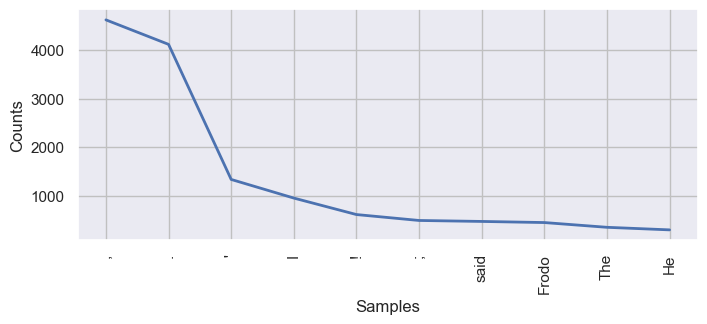

In [16]:
# Frequency Distribution Plot

plt.figure(figsize=(8, 3))
dist_words_filter.plot(10, cumulative = False)
plt.show()

In [17]:
dist_words_filter

FreqDist({',': 4627, '.': 4122, "'": 1336, 'I': 952, '!': 612, ';': 490, 'said': 470, 'Frodo': 447, 'The': 349, 'He': 296, ...})

In [18]:
# Substitute all punctuations marks with a space 

sans_punc = re.sub("[^a-zA-Z]",  # Search for all non-letters
                          " ",          # Replace all non-letters with spaces
                          str(filtered_words))

In [19]:
sans_punc

'  challenge    self styled    Ruler    Middle earth         In    conflict    sides    would    held    hobbits    hatred    contempt         would    long    survived    even    slaves         Other    arrangements    could    devised    according    tastes    views    like    allegory    topical    reference         But    I    cordially    dislike    allegory    manifestations         always    done    since    I    grew    old    wary    enough    detect    presence         I    much    prefer    history         true    feigned         varied    applicability    thought    experience    readers         I    think    many    confuse     applicability          allegory              one    resides    freedom    reader         purposed    domination    author         An    author    course    remain    wholly    unaffected    experience         ways    story germ    uses    soil    experience    extremely    complex         attempts    define    process    best    guesses    evidence 

In [20]:
# Word tokenization

tokenized_word_2 = word_tokenize(sans_punc)
print(tokenized_word_2)

['challenge', 'self', 'styled', 'Ruler', 'Middle', 'earth', 'In', 'conflict', 'sides', 'would', 'held', 'hobbits', 'hatred', 'contempt', 'would', 'long', 'survived', 'even', 'slaves', 'Other', 'arrangements', 'could', 'devised', 'according', 'tastes', 'views', 'like', 'allegory', 'topical', 'reference', 'But', 'I', 'cordially', 'dislike', 'allegory', 'manifestations', 'always', 'done', 'since', 'I', 'grew', 'old', 'wary', 'enough', 'detect', 'presence', 'I', 'much', 'prefer', 'history', 'true', 'feigned', 'varied', 'applicability', 'thought', 'experience', 'readers', 'I', 'think', 'many', 'confuse', 'applicability', 'allegory', 'one', 'resides', 'freedom', 'reader', 'purposed', 'domination', 'author', 'An', 'author', 'course', 'remain', 'wholly', 'unaffected', 'experience', 'ways', 'story', 'germ', 'uses', 'soil', 'experience', 'extremely', 'complex', 'attempts', 'define', 'process', 'best', 'guesses', 'evidence', 'inadequate', 'ambiguous', 'It', 'also', 'false', 'though', 'naturally',

In [21]:
# Create a new FreqDist

dist_words_filter_2 = FreqDist(tokenized_word_2)

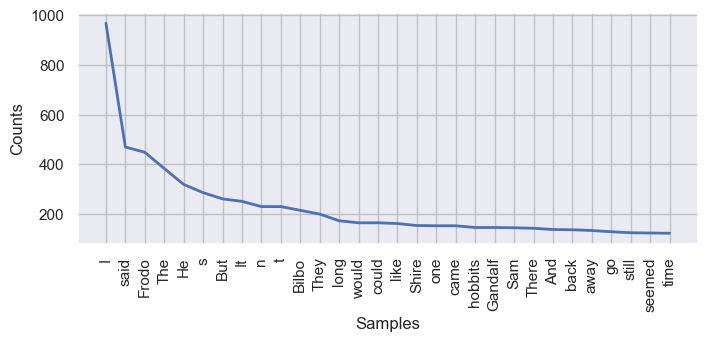

In [22]:
# Frequency Distribution Plot

plt.figure(figsize=(8, 3))
dist_words_filter_2.plot(30, cumulative = False)
plt.show()

In [23]:
dist_words_filter_2.most_common(20)

[('I', 967),
 ('said', 470),
 ('Frodo', 449),
 ('The', 384),
 ('He', 320),
 ('s', 287),
 ('But', 262),
 ('It', 252),
 ('n', 231),
 ('t', 231),
 ('Bilbo', 216),
 ('They', 201),
 ('long', 174),
 ('would', 166),
 ('could', 166),
 ('like', 163),
 ('Shire', 155),
 ('one', 154),
 ('came', 154),
 ('hobbits', 147)]

## POS Tags with TextBlob

In [24]:
token_word_full = word_tokenize(data)
print(token_word_full)

['J.', 'R.', 'R.', 'Tolkien', '—', 'The', 'Lord', 'Of', 'The', 'Rings', '.', '(', '1/4', ')', '--', '--', '--', '--', '--', '--', '--', '--', '--', '--', '--', '--', '--', '--', '--', '--', '--', '--', '--', '--', '--', '--', '--', '-', 'THE', 'LORD', 'OF', 'THE', 'RINGS', 'by', 'J.', 'R.', 'R.', 'TOLKIEN', 'Part', '1', ':', 'The', 'Fellowship', 'of', 'the', 'Ring', 'Part', '2', ':', 'The', 'Two', 'Towers', 'Part', '3', ':', 'The', 'Return', 'of', 'the', 'King_Complete', 'with', 'Index', 'and', 'Full', 'Appendices_', '_Three', 'Rings', 'for', 'the', 'Elven-kings', 'under', 'the', 'sky', ',', 'Seven', 'for', 'the', 'Dwarf-lords', 'in', 'their', 'halls', 'of', 'stone', ',', 'Nine', 'for', 'Mortal', 'Men', 'doomed', 'to', 'die', ',', 'One', 'for', 'the', 'Dark', 'Lord', 'on', 'his', 'dark', 'throne', 'In', 'the', 'Land', 'of', 'Mordor', 'where', 'the', 'Shadows', 'lie', '.', 'One', 'Ring', 'to', 'rule', 'them', 'all', ',', 'One', 'Ring', 'to', 'find', 'them', ',', 'One', 'Ring', 'to', 'br

In [26]:
len(data)

2574764

In [27]:
# Removing stopwords in the whole text

filtered_sent = [] # creates an empty list
for word in token_word_full:
    if word not in stop_words:
        filtered_sent.append(word)

In [28]:
len(filtered_sent)

346242

In [29]:
filtered_sent

['J.',
 'R.',
 'R.',
 'Tolkien',
 '—',
 'The',
 'Lord',
 'Of',
 'The',
 'Rings',
 '.',
 '(',
 '1/4',
 ')',
 '--',
 '--',
 '--',
 '--',
 '--',
 '--',
 '--',
 '--',
 '--',
 '--',
 '--',
 '--',
 '--',
 '--',
 '--',
 '--',
 '--',
 '--',
 '--',
 '--',
 '--',
 '--',
 '--',
 '-',
 'THE',
 'LORD',
 'OF',
 'THE',
 'RINGS',
 'J.',
 'R.',
 'R.',
 'TOLKIEN',
 'Part',
 '1',
 ':',
 'The',
 'Fellowship',
 'Ring',
 'Part',
 '2',
 ':',
 'The',
 'Two',
 'Towers',
 'Part',
 '3',
 ':',
 'The',
 'Return',
 'King_Complete',
 'Index',
 'Full',
 'Appendices_',
 '_Three',
 'Rings',
 'Elven-kings',
 'sky',
 ',',
 'Seven',
 'Dwarf-lords',
 'halls',
 'stone',
 ',',
 'Nine',
 'Mortal',
 'Men',
 'doomed',
 'die',
 ',',
 'One',
 'Dark',
 'Lord',
 'dark',
 'throne',
 'In',
 'Land',
 'Mordor',
 'Shadows',
 'lie',
 '.',
 'One',
 'Ring',
 'rule',
 ',',
 'One',
 'Ring',
 'find',
 ',',
 'One',
 'Ring',
 'bring',
 'darkness',
 'bind',
 'In',
 'Land',
 'Mordor',
 'Shadows',
 'lie._',
 'CONTENTS',
 'FOREWORD',
 'PROLOGUE',
 

In [30]:
new_stopwords = ["And", "Then"]

In [31]:
filtered_sent_2 = []
for word in filtered_sent:
    if word not in new_stopwords:
        filtered_sent_2.append(word)

In [32]:
%%time
text = TextBlob(str(filtered_sent_2))

CPU times: total: 344 ms
Wall time: 334 ms


In [37]:
text

TextBlob("['J.', 'R.', 'R.', 'Tolkien', '—', 'The', 'Lord', 'Of', 'The', 'Rings', '.', '(', '1/4', ')', '--', '--', '--', '--', '--', '--', '--', '--', '--', '--', '--', '--', '--', '--', '--', '--', '--', '--', '--', '--', '--', '--', '--', '-', 'THE', 'LORD', 'OF', 'THE', 'RINGS', 'J.', 'R.', 'R.', 'TOLKIEN', 'Part', '1', ':', 'The', 'Fellowship', 'Ring', 'Part', '2', ':', 'The', 'Two', 'Towers', 'Part', '3', ':', 'The', 'Return', 'King_Complete', 'Index', 'Full', 'Appendices_', '_Three', 'Rings', 'Elven-kings', 'sky', ',', 'Seven', 'Dwarf-lords', 'halls', 'stone', ',', 'Nine', 'Mortal', 'Men', 'doomed', 'die', ',', 'One', 'Dark', 'Lord', 'dark', 'throne', 'In', 'Land', 'Mordor', 'Shadows', 'lie', '.', 'One', 'Ring', 'rule', ',', 'One', 'Ring', 'find', ',', 'One', 'Ring', 'bring', 'darkness', 'bind', 'In', 'Land', 'Mordor', 'Shadows', 'lie._', 'CONTENTS', 'FOREWORD', 'PROLOGUE', '1', '.', 'Concerning', 'Hobbits', '2', '.', 'Concerning', 'Pipe-weed', '3', '.', 'Of', 'Ordering', 'Shire

In [43]:
tags_list = text.tags

In [44]:
tags_list

[('[', 'NN'),
 ('J', 'NNP'),
 ('R', 'NNP'),
 ('R', 'NNP'),
 ("'Tolkien", 'NNP'),
 ("'", 'POS'),
 ("'—", 'NNP'),
 ("'", 'POS'),
 ("'The", 'NNP'),
 ("'", 'POS'),
 ("'Lord", 'NNP'),
 ("'", 'POS'),
 ("'Of", 'NNP'),
 ("'", 'POS'),
 ("'The", 'NNP'),
 ("'", 'POS'),
 ("'Rings", 'NNS'),
 ("'", 'POS'),
 ('1/4', 'CD'),
 ("'-", 'JJ'),
 ("'LORD", 'NNP'),
 ("'", 'POS'),
 ("'OF", 'NNP'),
 ("'", 'POS'),
 ('J', 'NNP'),
 ('R', 'NNP'),
 ('R', 'NNP'),
 ("'TOLKIEN", 'NNP'),
 ("'", 'POS'),
 ("'Part", 'NNP'),
 ("'", 'POS'),
 ('1', 'CD'),
 ("'The", 'NNP'),
 ("'", 'POS'),
 ("'Ring", 'VBG'),
 ("'Part", 'NNP'),
 ("'", 'POS'),
 ('2', 'CD'),
 ("'The", 'NNP'),
 ("'", 'POS'),
 ("'Two", 'NNP'),
 ("'", 'POS'),
 ("'Towers", 'NNS'),
 ("'", 'POS'),
 ("'Part", 'NNP'),
 ("'", 'POS'),
 ('3', 'CD'),
 ("'The", 'NNP'),
 ("'", 'POS'),
 ("'Return", 'NNP'),
 ("'", 'POS'),
 ("'King_Complete", 'NNP'),
 ("'", 'POS'),
 ("'Index", 'NN'),
 ("'Full", 'NNP'),
 ("'", 'POS'),
 ("'Appendices_", 'NNP'),
 ("'", 'POS'),
 ("'Rings", 'NNS'),
 ("

In [45]:
df_text = pd.DataFrame(tags_list)
df_text.columns = ['Words', "Word type"]

In [46]:
df_text.head()

Words Word type
0         [        NN
1         J       NNP
2         R       NNP
3         R       NNP
4  'Tolkien       NNP

In [47]:
df_t = df_text.groupby('Word type').count().reset_index()

In [48]:
df_t.head()

Word type  Words
0        CC     34
1        CD   2941
2        DT   1114
3        EX   1143
4        FW    918

In [49]:
top20 = df_t.nlargest(20, 'Words')

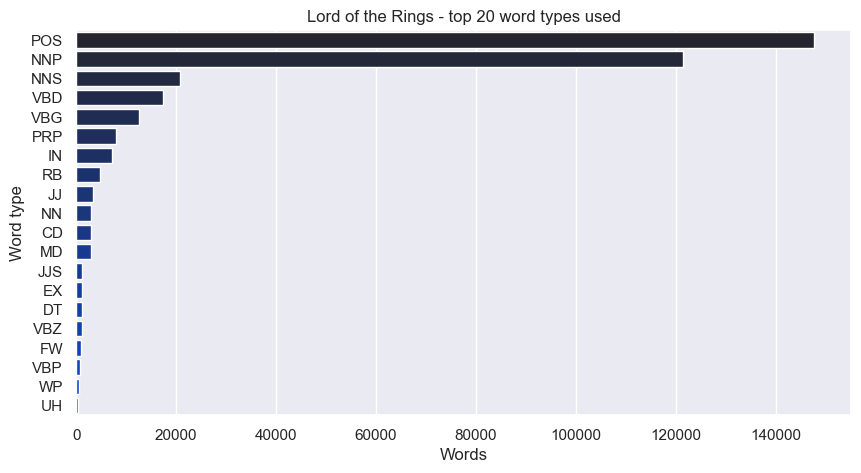

In [50]:
plt.figure(figsize = (10, 5))
with sns.dark_palette("xkcd:blue", 20):
    sns.barplot(x = "Words", y = "Word type",
    saturation = 0.9, data = top20).set_title("Lord of the Rings - top 20 word types used")

In [51]:
# def word_analysis(word_type):
#     filtered = [row for row in my_list if str(word_type) in row[1]]
#     print("filtered for " + word_type)
#     df = pd.DataFrame(filtered)
#     df.columns = ["Word", "Occurences"]
#     x=df.groupby('Word').count().reset_index()
#     y=x.sort_values(by=['Occurences'], ascending=False)
#     top10=y.nlargest(10, 'Occurences')
#     plt.figure(figsize=(10, 5))
#     sns.barplot(x="Word", y="Occurences", palette="rocket", saturation=0.9, data=top10).set_title("Lord of the rings - most frequently used "+ word_type +" type word")

In [52]:
df = df_text[(df_text['Word type'] == "NN") | (df_text['Word type'] == "NNS") | (df_text['Word type'] == "NNP")]
df.columns = ["Word", "Occurences"]
x = df.groupby('Word').count().reset_index()
y = x.sort_values(by = ['Occurences'], ascending=False)
top10 = y.nlargest(10, 'Occurences')

In [53]:
top10

Word  Occurences
7718   'said        4106
1918    'The        2178
781   'Frodo        1978
319     'But        1765
936      'He        1758
1661    'Sam        1277
6119   'long        1090
1076     'It        1079
5124  'great        1026
3586   'come         977

In [54]:
top10["Word"].value_counts()

'said     1
'The      1
'Frodo    1
'But      1
'He       1
'Sam      1
'long     1
'It       1
'great    1
'come     1
Name: Word, dtype: int64

In [55]:
top10.dtypes

Word          object
Occurences     int64
dtype: object

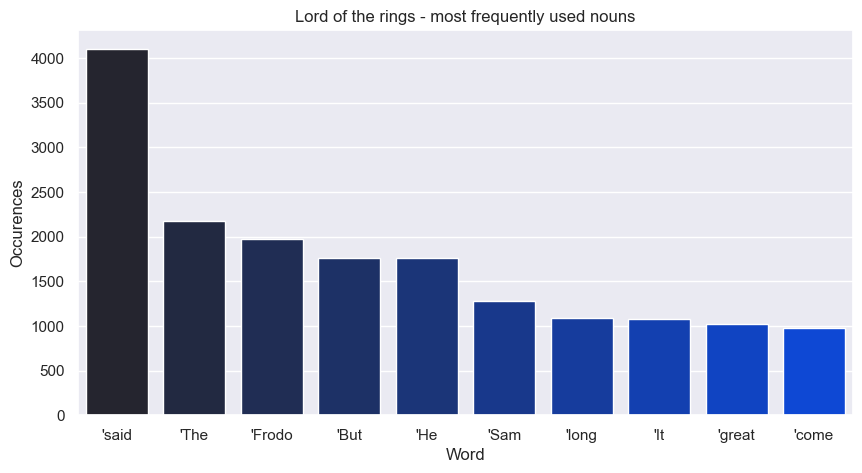

In [56]:
plt.figure(figsize=(10, 5))
with sns.dark_palette("xkcd:blue", 10):
    sns.barplot(x="Word", y="Occurences",
    saturation=0.9, data=top10).set_title("Lord of the rings - most frequently used nouns")

In [57]:
new_stop= ["The", "It","But"] 

In [58]:
filtered_sent_3 = []
for word in filtered_sent_2:
    if word not in new_stop:
        filtered_sent_3.append(word)

In [59]:
%%time
text = TextBlob(str(filtered_sent_3))

CPU times: total: 281 ms
Wall time: 304 ms


In [60]:
tags_list = text.tags

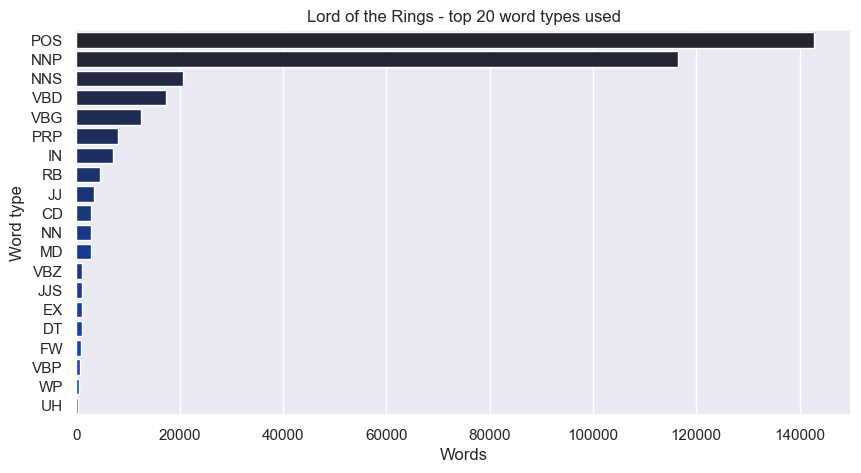

In [61]:
df_text = pd.DataFrame(tags_list)
df_text.columns = ['Words', "Word type"]
df_t = df_text.groupby('Word type').count().reset_index()
top20 = df_t.nlargest(20, 'Words')
plt.figure(figsize = (10, 5))
with sns.dark_palette("xkcd:blue", 20):
    sns.barplot(x = "Words", y = "Word type",
    saturation = 0.9, data = top20).set_title("Lord of the Rings - top 20 word types used")

In [62]:
df = df_text[(df_text['Word type'] == "NN") | (df_text['Word type'] == "NNS") | (df_text['Word type'] == "NNP")]
df.columns = ["Word", "Occurences"]
x = df.groupby('Word').count().reset_index()
y = x.sort_values(by = ['Occurences'], ascending=False)
top10 = y.nlargest(10, 'Occurences')

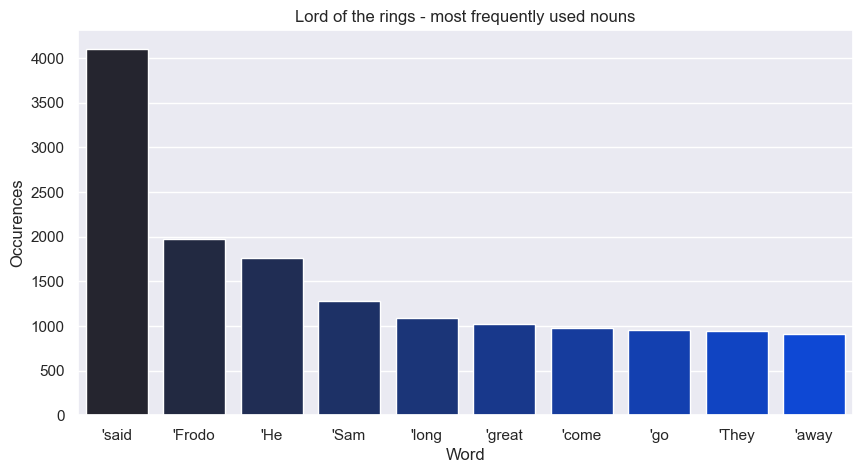

In [63]:
plt.figure(figsize=(10, 5))
with sns.dark_palette("xkcd:blue", 10):
    sns.barplot(x="Word", y="Occurences",
    saturation=0.9, data=top10).set_title("Lord of the rings - most frequently used nouns")

In [55]:
df = df_text[(df_text['Word type'] == "NN") | (df_text['Word type'] == "NNS")]
df.columns = ["Word", "Occurences"]
x = df.groupby('Word').count().reset_index()
y = x.sort_values(by=['Occurences'], ascending=False)
top10 = y.nlargest(10, 'Occurences')

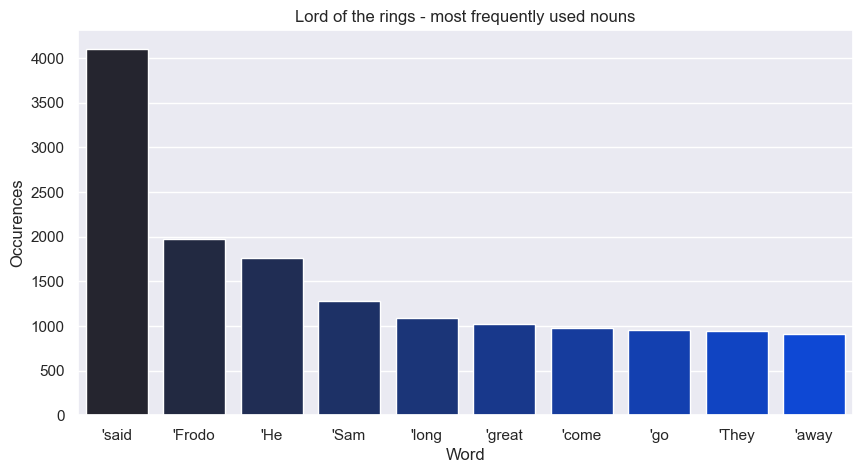

In [64]:
plt.figure(figsize=(10, 5))
with sns.dark_palette("xkcd:blue", 10):
    sns.barplot(x="Word", y="Occurences",
    saturation=0.9, data=top10).set_title("Lord of the rings - most frequently used nouns")

In [65]:
df = df_text[df_text['Word type'] == "VB"]
df.columns = ["Word", "Occurences"]
x = df.groupby('Word').count().reset_index()
y = x.sort_values(by=['Occurences'], ascending=False)
top10 = y.nlargest(10, 'Occurences')

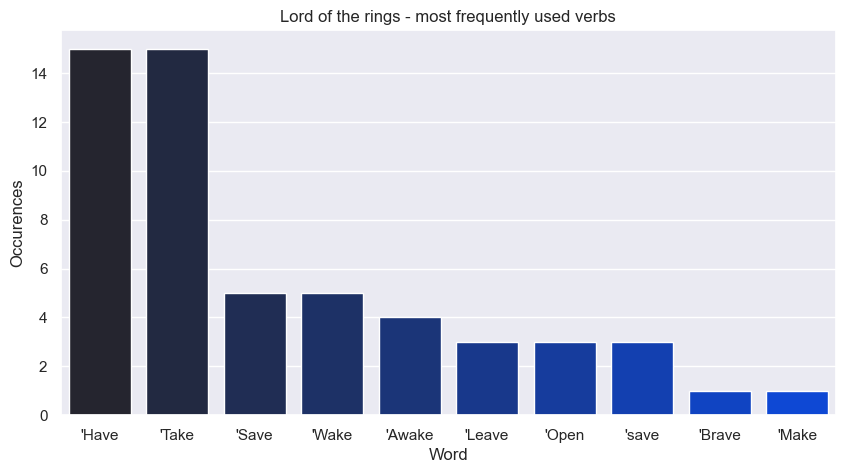

In [66]:
plt.figure(figsize=(10, 5))
with sns.dark_palette("xkcd:blue", 10):
    sns.barplot(x="Word", y="Occurences",
    saturation=0.9, data=top10).set_title("Lord of the rings - most frequently used verbs")

In [59]:
df = df_text[df_text['Word type'] == "VBD"]
df.columns = ["Word", "Occurences"]
x = df.groupby('Word').count().reset_index()
y = x.sort_values(by=['Occurences'], ascending=False)
top10 = y.nlargest(10, 'Occurences')

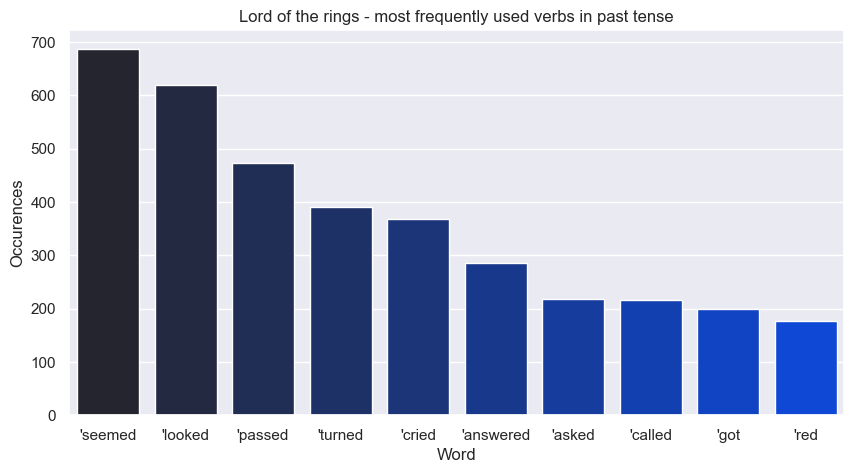

In [60]:
plt.figure(figsize=(10, 5))
with sns.dark_palette("xkcd:blue", 10):
    sns.barplot(x="Word", y="Occurences",
    saturation=0.9, data=top10).set_title("Lord of the rings - most frequently used verbs in past tense")

In [61]:
df = df_text[df_text['Word type'] == "JJ"]
df.columns = ["Word", "Occurences"]
x = df.groupby('Word').count().reset_index()
y = x.sort_values(by=['Occurences'], ascending=False)
top10 = y.nlargest(10, 'Occurences')

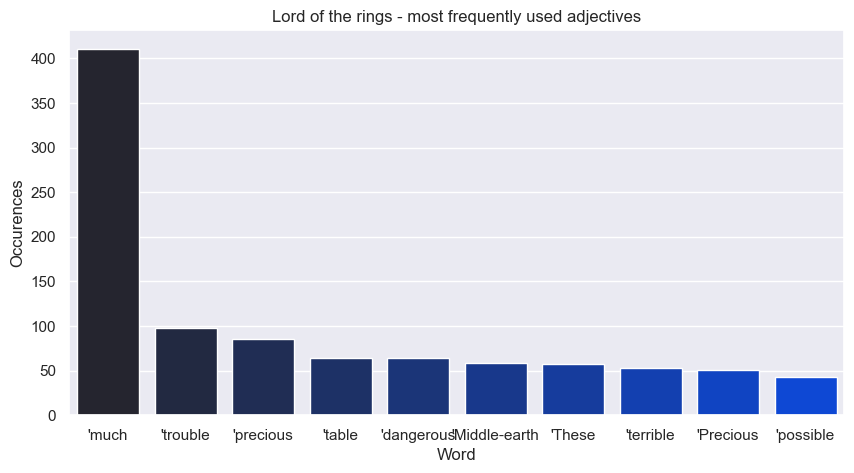

In [62]:
plt.figure(figsize=(10, 5))
with sns.dark_palette("xkcd:blue", 10):
    sns.barplot(x="Word", y="Occurences",
    saturation=0.9, data=top10).set_title("Lord of the rings - most frequently used adjectives")

In [63]:
chars = pd.read_csv("LOTR_characters.csv", index_col = None)

In [64]:
chars.head()

character
0   Aragorn II Elessar
1                Arwen
2        Frodo Baggins
3              Boromir
4  Meriadoc Brandybuck

In [67]:
chars['character_first_name'] = chars['character'].apply(lambda x: x.split(' ', 1)[0])

In [96]:
chars

character character_first_name
0     Aragorn II Elessar              Aragorn
1                  Arwen                Arwen
2          Frodo Baggins                Frodo
3                Boromir              Boromir
4    Meriadoc Brandybuck             Meriadoc
5               Celeborn             Celeborn
6            Denethor II             Denethor
7                 Elrond               Elrond
8                  Éomer                Éomer
9                  Éowyn                Éowyn
10            Erkenbrand           Erkenbrand
11               Faramir              Faramir
12             Galadriel            Galadriel
13        Samwise Gamgee              Samwise
14               Gandalf              Gandalf
15                 Gimli                Gimli
16            Glorfindel           Glorfindel
17                Gollum               Gollum
18               Gwaihir              Gwaihir
19               Legolas              Legolas
20               Saruman              Saruman
21                Sauron               Sauron
22               Théoden              Théoden
23         Peregrin Took             Peregrin
24             Treebeard            Treebeard
25  Witch-king of Angmar           Witch-king
26      Gríma Wormtongue                Gríma

In [68]:
chars.head()

character character_first_name
0   Aragorn II Elessar              Aragorn
1                Arwen                Arwen
2        Frodo Baggins                Frodo
3              Boromir              Boromir
4  Meriadoc Brandybuck             Meriadoc

In [69]:
char_list = chars['character_first_name'].to_list()

In [70]:
# Create a count for the main characters

all_counts = Counter(re.sub(r'\W+', ' ', data).split())

In [71]:
all_counts

Counter({'J': 4,
         'R': 15,
         'Tolkien': 3,
         'The': 2410,
         'Lord': 247,
         'Of': 90,
         'Rings': 28,
         '1': 19,
         '4': 15,
         'THE': 29,
         'LORD': 3,
         'OF': 17,
         'RINGS': 2,
         'by': 1314,
         'TOLKIEN': 1,
         'Part': 11,
         'Fellowship': 7,
         'of': 13021,
         'the': 26869,
         'Ring': 365,
         '2': 15,
         'Two': 37,
         'Towers': 13,
         '3': 16,
         'Return': 5,
         'King_Complete': 1,
         'with': 2940,
         'Index': 1,
         'and': 18486,
         'Full': 3,
         'Appendices_': 1,
         '_Three': 2,
         'for': 3073,
         'Elven': 37,
         'kings': 57,
         'under': 481,
         'sky': 214,
         'Seven': 19,
         'Dwarf': 61,
         'lords': 45,
         'in': 6902,
         'their': 1778,
         'halls': 33,
         'stone': 308,
         'Nine': 48,
         'Mortal': 5,
        

In [72]:
dict_of_counts = {d : all_counts[d] for d in char_list}

In [73]:
dict_of_counts

{'Aragorn': 721,
 'Arwen': 17,
 'Frodo': 1986,
 'Boromir': 277,
 'Meriadoc': 32,
 'Celeborn': 41,
 'Denethor': 144,
 'Elrond': 184,
 'Éomer': 0,
 'Éowyn': 0,
 'Erkenbrand': 13,
 'Faramir': 297,
 'Galadriel': 85,
 'Samwise': 29,
 'Gandalf': 1121,
 'Gimli': 390,
 'Glorfindel': 37,
 'Gollum': 403,
 'Gwaihir': 13,
 'Legolas': 340,
 'Saruman': 285,
 'Sauron': 142,
 'Théoden': 0,
 'Peregrin': 52,
 'Treebeard': 151,
 'Witch-king': 0,
 'Gríma': 0}

In [74]:
# Search for the names from the list in the dictionary

dct = {v:[k] for v,k in dict_of_counts.items()}  
df = pd.DataFrame(dct)

In [75]:
df

Aragorn  Arwen  Frodo  Boromir  Meriadoc  Celeborn  Denethor  Elrond  \
0      721     17   1986      277        32        41       144     184   

   Éomer  Éowyn  ...  Gollum  Gwaihir  Legolas  Saruman  Sauron  Théoden  \
0      0      0  ...     403       13      340      285     142        0   

   Peregrin  Treebeard  Witch-king  Gríma  
0        52        151           0      0  

[1 rows x 27 columns]

In [76]:
df = df.transpose().reset_index()

In [77]:
df.dtypes

index    object
0         int64
dtype: object

In [78]:
df

index     0
0      Aragorn   721
1        Arwen    17
2        Frodo  1986
3      Boromir   277
4     Meriadoc    32
5     Celeborn    41
6     Denethor   144
7       Elrond   184
8        Éomer     0
9        Éowyn     0
10  Erkenbrand    13
11     Faramir   297
12   Galadriel    85
13     Samwise    29
14     Gandalf  1121
15       Gimli   390
16  Glorfindel    37
17      Gollum   403
18     Gwaihir    13
19     Legolas   340
20     Saruman   285
21      Sauron   142
22     Théoden     0
23    Peregrin    52
24   Treebeard   151
25  Witch-king     0
26       Gríma     0

In [80]:
df.rename(columns = {"index":"Character", 0:"Times mentioned"}, inplace = True)

In [81]:
df

Character  Times mentioned
0      Aragorn              721
1        Arwen               17
2        Frodo             1986
3      Boromir              277
4     Meriadoc               32
5     Celeborn               41
6     Denethor              144
7       Elrond              184
8        Éomer                0
9        Éowyn                0
10  Erkenbrand               13
11     Faramir              297
12   Galadriel               85
13     Samwise               29
14     Gandalf             1121
15       Gimli              390
16  Glorfindel               37
17      Gollum              403
18     Gwaihir               13
19     Legolas              340
20     Saruman              285
21      Sauron              142
22     Théoden                0
23    Peregrin               52
24   Treebeard              151
25  Witch-king                0
26       Gríma                0

In [82]:
df.shape

(27, 2)

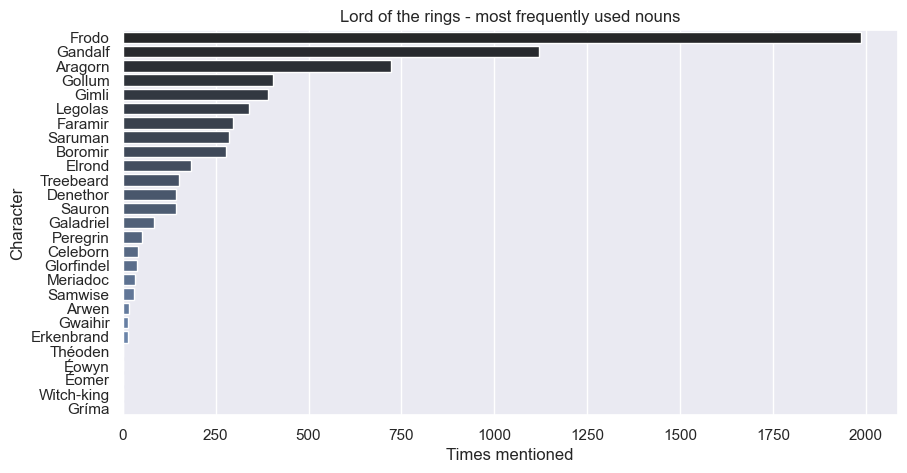

In [83]:
plt.figure(figsize=(10, 5))
with sns.dark_palette("#79C", 27):
    sns.barplot(x = "Times mentioned", y = "Character",
    saturation=0.9, data = df.sort_values("Times mentioned", ascending = False)).set_title("Lord of the rings - most frequently used nouns")

In [93]:
df['Character']=df['Character'].replace('Witch-king','Witch-lord')

In [95]:
df

Character  Times mentioned
0      Aragorn              721
1        Arwen               17
2        Frodo             1986
3      Boromir              277
4     Meriadoc               32
5     Celeborn               41
6     Denethor              144
7       Elrond              184
8        Éomer                0
9        Éowyn                0
10  Erkenbrand               13
11     Faramir              297
12   Galadriel               85
13     Samwise               29
14     Gandalf             1121
15       Gimli              390
16  Glorfindel               37
17      Gollum              403
18     Gwaihir               13
19     Legolas              340
20     Saruman              285
21      Sauron              142
22     Théoden                0
23    Peregrin               52
24   Treebeard              151
25  Witch-lord                0
26       Gríma                0

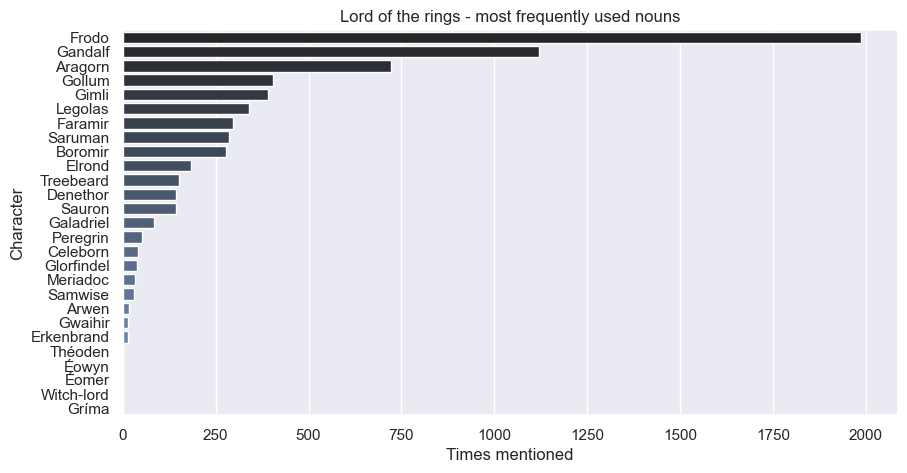

In [94]:
plt.figure(figsize=(10, 5))
with sns.dark_palette("#79C", 27):
    sns.barplot(x = "Times mentioned", y = "Character",
    saturation=0.9, data = df.sort_values("Times mentioned", ascending = False)).set_title("Lord of the rings - most frequently used nouns")

In [84]:
df_2 = df[df["Times mentioned"] != 0]

In [85]:
df_2.shape

(22, 2)

In [86]:
df_2.sort_values("Times mentioned", ascending = False)

Character  Times mentioned
2        Frodo             1986
14     Gandalf             1121
0      Aragorn              721
17      Gollum              403
15       Gimli              390
19     Legolas              340
11     Faramir              297
20     Saruman              285
3      Boromir              277
7       Elrond              184
24   Treebeard              151
6     Denethor              144
21      Sauron              142
12   Galadriel               85
23    Peregrin               52
5     Celeborn               41
16  Glorfindel               37
4     Meriadoc               32
13     Samwise               29
1        Arwen               17
10  Erkenbrand               13
18     Gwaihir               13

In [87]:
df_2

Character  Times mentioned
0      Aragorn              721
1        Arwen               17
2        Frodo             1986
3      Boromir              277
4     Meriadoc               32
5     Celeborn               41
6     Denethor              144
7       Elrond              184
10  Erkenbrand               13
11     Faramir              297
12   Galadriel               85
13     Samwise               29
14     Gandalf             1121
15       Gimli              390
16  Glorfindel               37
17      Gollum              403
18     Gwaihir               13
19     Legolas              340
20     Saruman              285
21      Sauron              142
23    Peregrin               52
24   Treebeard              151

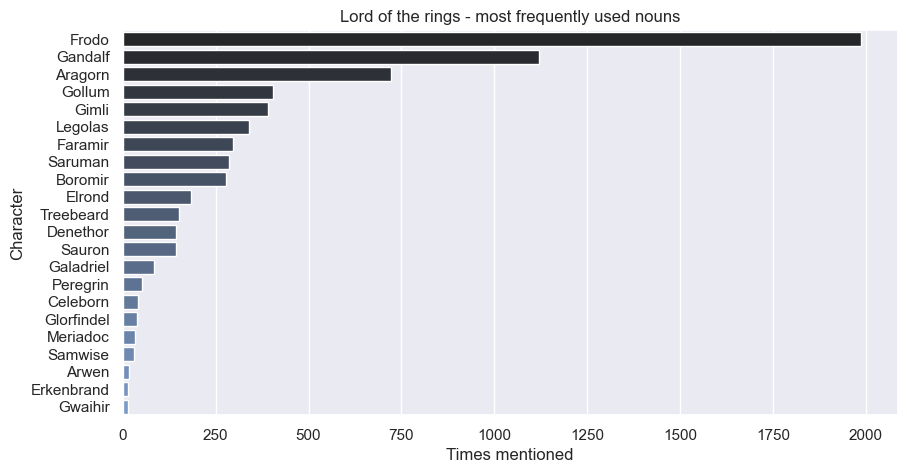

In [88]:
plt.figure(figsize=(10, 5))
with sns.dark_palette("#79C", 22):
    sns.barplot(x = "Times mentioned", y = "Character",
    saturation=0.9, data = df_2.sort_values("Times mentioned", ascending = False)).set_title("Lord of the rings - most frequently used nouns")

## Sentiment Analysis

In [90]:
text_sent = TextBlob(str(tokenized_sent_full))

In [91]:
print(text_sent.sentiment)

Sentiment(polarity=0.06299887888911528, subjectivity=0.480938250615069)
